In [8]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/t109590004
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/t109590004


'/content/drive/MyDrive/t109590004'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [10]:
# 讀取csv檔案
data = pd.read_csv('international-airline-passengers.csv')
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')
data.head()

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data['passengers'][0]

112

In [11]:
# 畫出趨勢圖
def get_picture(data = data):
  data['passengers'].plot() # 以passengers欄位畫出折線圖
  plt.figure(figsize=(100,50)) # 設定圖的寬度與高度(單位: inches)
  plt.show()

In [12]:
# 轉化序列
def processing(data=data,long=11):
  """
  依次轉化為11列
  """
  data['passengers'] = data['passengers'].astype(float)
  sample = len(data) - long + 1
  print('long:', long)
  print('得到{}個樣本'.format(sample))
  data_sample = []
  for i in range(sample):
    data_sample.append(data['passengers'][i:i+long])
  data_sample = np.array(data_sample)
  return data_sample

In [21]:
# 訓練LSTM網路
def lstm(input_data= None):
  scaler_x = MinMaxScaler()
  scaler_y = MinMaxScaler()
  x = input_data[:,:-1]
  y = input_data[:,-1]
  x = scaler_x.fit_transform(x)
  y = scaler_y.fit_transform(np.reshape(y,(len(y),1)))
  spilt = int(len(y)*0.8)
  x_train = x[:spilt]
  x_test = x[spilt:]
  y_train = y[:spilt]
  y_test = y[spilt:]
  x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

  model = Sequential() # 初始化Sequential模型
  model.add(LSTM(50,input_shape=(x_train.shape[1],1),return_sequences=True))
  model.add(LSTM(500))
  model.add(Dense(1,activation='linear'))
  model.compile(loss='mse', optimizer='rmsprop') # 定義損失函數(loss)、最佳化函數(optimizer)
  print('Train...')
  history = model.fit(x_train, y_train, batch_size=8, epochs=500, validation_split=0.1)
  
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4.5))
  # 畫出train_loss
  ax1.set_title('train_loss')
  ax1.set_ylabel('loss')
  ax1.set_xlabel('Epoch')
  ax1.plot(history.history["loss"])

  predict = model.predict(x_test)
  y_test = scaler_y.inverse_transform(np.reshape(y_test, (len(y_test), 1)))
  predict = scaler_y.inverse_transform(predict)

  # 畫出預測圖
  ax2.set_title('prediction')
  ax2.set_ylabel('passengers')
  ax2.set_xlabel('time')
  ax2.plot(predict, 'g:')
  ax2.plot(y_test, 'r-')
  fig.show()

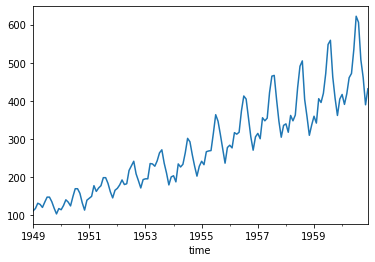

<Figure size 7200x3600 with 0 Axes>

long: 11
得到134個樣本
Train...
Epoch 1/300
12/12 [==============================] - 5s 166ms/step - loss: 0.0292 - val_loss: 0.0232
Epoch 2/300
12/12 [==============================] - 1s 63ms/step - loss: 0.0086 - val_loss: 0.0579
Epoch 3/300
12/12 [==============================] - 1s 65ms/step - loss: 0.0135 - val_loss: 0.0352
Epoch 4/300
12/12 [==============================] - 1s 62ms/step - loss: 0.0085 - val_loss: 0.0812
Epoch 5/300
12/12 [==============================] - 1s 64ms/step - loss: 0.0152 - val_loss: 0.0230
Epoch 6/300
12/12 [==============================] - 1s 64ms/step - loss: 0.0071 - val_loss: 0.0238
Epoch 7/300
12/12 [==============================] - 1s 64ms/step - loss: 0.0095 - val_loss: 0.0516
Epoch 8/300
12/12 [==============================] - 1s 65ms/step - loss: 0.0112 - val_loss: 0.0301
Epoch 9/300
12/12 [==============================] - 1s 68ms/step - loss: 0.0077 - val_loss: 0.0193
Epoch 10/300
12/12 [==============================] - 1s 65ms/step - los

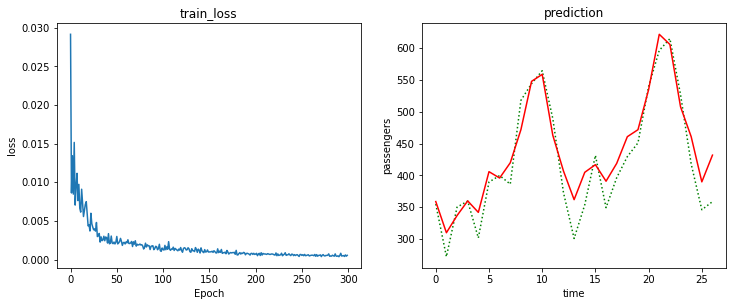

In [22]:
get_picture()       # 畫出趨勢圖
sam = processing()  # 轉化序列
lstm(sam)           # 進行LSTM訓練及預測